# **Imports**

In [73]:
# Preprocessing
import zipfile as zf
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Add your libraries here

# **Read in the data**

In [74]:
# Use the current working directory
current_dir = os.getcwd()

# Kaggle
if current_dir == "/kaggle/working":
    current_dir = "/kaggle/input/"


file_test_path = f"{current_dir}/dog-breeds-recognition/testing.csv"
file_train_path = f"{current_dir}/dog-breeds-recognition/training.csv"

print(f"Test set: {file_test_path}")
print(f"Train set: {file_train_path}")

Test set: /Users/tomkwok/Developer/info911-project/dog-breeds-recognition/testing.csv
Train set: /Users/tomkwok/Developer/info911-project/dog-breeds-recognition/training.csv


In [75]:
# read in train
df_train = pd.read_csv(file_train_path, header=None)
print(f"Are there any null values in Train: {df_train.isnull().values.any()}")
df_train

Are there any null values in Train: False


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,n02085620-Chihuahua\n02085620_5927.jpg,1,3.508880,0.928564,0.298451,0.202423,0.273040,0.073741,0.260721,2.454843,...,0.929986,0.959449,1.033072,0.104633,1.102810,0.058879,0.508010,0.386740,0.182575,0.764517
1,n02085620-Chihuahua\n02085620_4441.jpg,1,0.447207,0.152954,0.214087,1.132086,0.984579,0.352944,0.616292,1.692439,...,1.842100,0.193077,0.103465,1.228296,2.554505,0.303815,0.544647,0.715426,0.916348,0.240079
2,n02085620-Chihuahua\n02085620_1502.jpg,1,1.730776,0.405669,0.187414,0.365856,0.512063,0.772889,0.267891,0.160474,...,2.033174,0.272994,0.217314,1.633859,1.064902,0.221387,1.036172,0.591452,0.733662,1.475364
3,n02085620-Chihuahua\n02085620_1916.jpg,1,1.986778,0.475547,0.114825,0.263515,0.743351,0.053917,0.293086,0.466959,...,1.581877,0.216979,0.313218,2.389633,1.645630,0.348484,0.936218,0.733054,0.740681,1.340304
4,n02085620-Chihuahua\n02085620_13151.jpg,1,0.000000,0.993176,0.362772,0.117868,0.257813,0.817096,0.777969,0.930595,...,1.301286,0.631204,0.194294,0.170246,2.551018,0.000000,3.035839,0.058260,1.350222,3.290168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,n02116738-African_hunting_dog\n02116738_10614.jpg,120,0.051192,0.263571,1.953465,0.144953,1.881053,1.025135,1.309460,0.026804,...,0.804875,0.278833,0.003926,0.465810,0.050890,1.009473,1.667273,1.975637,0.620393,0.057779
11996,n02116738-African_hunting_dog\n02116738_9282.jpg,120,2.393783,0.583523,0.070011,2.168356,2.056204,0.418436,0.592864,2.390873,...,0.225061,0.229859,0.935760,0.655962,0.289180,0.623364,1.158500,1.949258,1.581664,0.121391
11997,n02116738-African_hunting_dog\n02116738_6754.jpg,120,0.082882,0.210209,1.683243,0.442680,2.221987,1.028761,2.321181,0.150616,...,0.237797,0.049576,0.205640,0.424587,0.558180,0.732412,1.422601,2.745240,0.044735,0.282376
11998,n02116738-African_hunting_dog\n02116738_9333.jpg,120,0.027123,0.675996,0.353758,0.421884,0.610241,0.311903,1.028679,0.632097,...,1.706490,0.396890,0.092548,1.995632,0.000000,1.191216,0.196342,0.957877,0.736384,0.034472


In [76]:
# read in test
df_test = pd.read_csv(file_test_path, header=None)
print(f"Are there any null values in Test: {df_test.isnull().values.any()}")
df_test

Are there any null values in Test: False


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,n02085620-Chihuahua\n02085620_2650.jpg,1,2.750876,0.402823,0.490048,0.088944,0.067087,0.097192,0.188324,0.554036,...,1.009560,0.560529,0.000568,1.048601,1.888090,0.000000,0.072166,0.522479,0.072563,0.040364
1,n02085620-Chihuahua\n02085620_4919.jpg,1,3.723587,1.346295,0.413855,1.559932,2.922223,0.046513,0.065089,0.748078,...,0.800828,0.310406,0.141535,0.613455,1.598750,0.285342,2.139037,1.185468,2.046112,1.761059
2,n02085620-Chihuahua\n02085620_1765.jpg,1,0.971007,0.447430,0.136485,0.470510,0.371954,0.112476,0.265642,0.300397,...,0.944592,1.212590,0.189738,1.528287,2.109546,0.329096,1.496220,1.040246,0.000382,1.097506
3,n02085620-Chihuahua\n02085620_3006.jpg,1,1.874442,1.340326,0.430788,1.061602,0.018172,0.659020,0.024218,0.541496,...,2.426595,0.921312,0.569086,0.939952,1.300098,1.269613,0.131599,0.544578,0.598401,0.251547
4,n02085620-Chihuahua\n02085620_1492.jpg,1,0.254995,1.975686,0.795596,0.792883,0.491056,1.389314,0.066709,0.368587,...,1.439100,1.203172,0.787512,0.178735,0.667279,0.644420,1.120357,1.260047,0.071751,1.355075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,n02116738-African_hunting_dog\n02116738_4991.jpg,120,0.068341,0.824908,0.193437,0.906468,2.191380,0.567653,2.182863,0.541500,...,0.270837,0.148257,0.538312,0.221652,1.261061,0.393819,0.931265,1.368547,0.725584,1.802775
8576,n02116738-African_hunting_dog\n02116738_3024.jpg,120,0.012424,0.074204,1.992666,0.076113,0.573071,1.246892,0.586113,0.114273,...,0.544384,0.052004,0.279680,0.214920,1.575158,1.586292,1.686255,0.970767,1.198236,0.281134
8577,n02116738-African_hunting_dog\n02116738_3635.jpg,120,0.090567,0.394184,1.207222,0.123069,2.618800,0.823760,3.099759,0.373843,...,0.082895,0.005232,0.012785,0.310990,0.028843,1.175330,0.576579,1.986010,0.086537,0.805687
8578,n02116738-African_hunting_dog\n02116738_2988.jpg,120,0.249121,0.176359,2.857338,0.408916,0.582186,1.393884,2.366030,0.707135,...,0.592481,0.396963,0.142146,0.550736,0.031739,0.102475,2.250938,0.885802,1.031099,0.105213


# **Reformat Dataframe**
* The dataset doesn't come with column names, lets add some

In [77]:
def reformat_df(df):
  df = df.rename(columns={0:"image_path", 1:"target"})
  for header in df.columns[2:]:
    new_header = f"feature_{header-1}"
    df.rename(columns={header:new_header}, inplace=True)
  df = df.set_index("image_path")
  return df

In [78]:
df_train = reformat_df(df_train)
df_train

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
image_path,,,,,,,,,,,,,,,,,,,,,
n02085620-Chihuahua\n02085620_5927.jpg,1,3.508880,0.928564,0.298451,0.202423,0.273040,0.073741,0.260721,2.454843,0.677149,...,0.929986,0.959449,1.033072,0.104633,1.102810,0.058879,0.508010,0.386740,0.182575,0.764517
n02085620-Chihuahua\n02085620_4441.jpg,1,0.447207,0.152954,0.214087,1.132086,0.984579,0.352944,0.616292,1.692439,1.767242,...,1.842100,0.193077,0.103465,1.228296,2.554505,0.303815,0.544647,0.715426,0.916348,0.240079
n02085620-Chihuahua\n02085620_1502.jpg,1,1.730776,0.405669,0.187414,0.365856,0.512063,0.772889,0.267891,0.160474,1.124645,...,2.033174,0.272994,0.217314,1.633859,1.064902,0.221387,1.036172,0.591452,0.733662,1.475364
n02085620-Chihuahua\n02085620_1916.jpg,1,1.986778,0.475547,0.114825,0.263515,0.743351,0.053917,0.293086,0.466959,0.154945,...,1.581877,0.216979,0.313218,2.389633,1.645630,0.348484,0.936218,0.733054,0.740681,1.340304
n02085620-Chihuahua\n02085620_13151.jpg,1,0.000000,0.993176,0.362772,0.117868,0.257813,0.817096,0.777969,0.930595,1.155066,...,1.301286,0.631204,0.194294,0.170246,2.551018,0.000000,3.035839,0.058260,1.350222,3.290168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n02116738-African_hunting_dog\n02116738_10614.jpg,120,0.051192,0.263571,1.953465,0.144953,1.881053,1.025135,1.309460,0.026804,1.145573,...,0.804875,0.278833,0.003926,0.465810,0.050890,1.009473,1.667273,1.975637,0.620393,0.057779
n02116738-African_hunting_dog\n02116738_9282.jpg,120,2.393783,0.583523,0.070011,2.168356,2.056204,0.418436,0.592864,2.390873,0.191504,...,0.225061,0.229859,0.935760,0.655962,0.289180,0.623364,1.158500,1.949258,1.581664,0.121391
n02116738-African_hunting_dog\n02116738_6754.jpg,120,0.082882,0.210209,1.683243,0.442680,2.221987,1.028761,2.321181,0.150616,1.760209,...,0.237797,0.049576,0.205640,0.424587,0.558180,0.732412,1.422601,2.745240,0.044735,0.282376


In [79]:
df_test = reformat_df(df_test)
df_test

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
image_path,,,,,,,,,,,,,,,,,,,,,
n02085620-Chihuahua\n02085620_2650.jpg,1,2.750876,0.402823,0.490048,0.088944,0.067087,0.097192,0.188324,0.554036,0.597607,...,1.009560,0.560529,0.000568,1.048601,1.888090,0.000000,0.072166,0.522479,0.072563,0.040364
n02085620-Chihuahua\n02085620_4919.jpg,1,3.723587,1.346295,0.413855,1.559932,2.922223,0.046513,0.065089,0.748078,1.062587,...,0.800828,0.310406,0.141535,0.613455,1.598750,0.285342,2.139037,1.185468,2.046112,1.761059
n02085620-Chihuahua\n02085620_1765.jpg,1,0.971007,0.447430,0.136485,0.470510,0.371954,0.112476,0.265642,0.300397,1.756382,...,0.944592,1.212590,0.189738,1.528287,2.109546,0.329096,1.496220,1.040246,0.000382,1.097506
n02085620-Chihuahua\n02085620_3006.jpg,1,1.874442,1.340326,0.430788,1.061602,0.018172,0.659020,0.024218,0.541496,0.913266,...,2.426595,0.921312,0.569086,0.939952,1.300098,1.269613,0.131599,0.544578,0.598401,0.251547
n02085620-Chihuahua\n02085620_1492.jpg,1,0.254995,1.975686,0.795596,0.792883,0.491056,1.389314,0.066709,0.368587,1.323611,...,1.439100,1.203172,0.787512,0.178735,0.667279,0.644420,1.120357,1.260047,0.071751,1.355075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n02116738-African_hunting_dog\n02116738_4991.jpg,120,0.068341,0.824908,0.193437,0.906468,2.191380,0.567653,2.182863,0.541500,0.469749,...,0.270837,0.148257,0.538312,0.221652,1.261061,0.393819,0.931265,1.368547,0.725584,1.802775
n02116738-African_hunting_dog\n02116738_3024.jpg,120,0.012424,0.074204,1.992666,0.076113,0.573071,1.246892,0.586113,0.114273,1.963169,...,0.544384,0.052004,0.279680,0.214920,1.575158,1.586292,1.686255,0.970767,1.198236,0.281134
n02116738-African_hunting_dog\n02116738_3635.jpg,120,0.090567,0.394184,1.207222,0.123069,2.618800,0.823760,3.099759,0.373843,0.408895,...,0.082895,0.005232,0.012785,0.310990,0.028843,1.175330,0.576579,1.986010,0.086537,0.805687


# **Create train/validation/test splits**
* From the training set, we will create a small validation set which is going to be used to find the best Hyperparameter for the models.
* We cant use the test set because that will lead to something called model leakage!!!

In [80]:
# train features
X = df_train.iloc[:,1:]
# train labels
y = df_train.iloc[:,0]

# create the training & validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.15, shuffle=True, random_state=7)

# re-assign the test set variables for consistency & shuffle
df_test = df_test.sample(frac = 1)
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [81]:
print(f"Training Data: {X_train.shape}")
print(f"Training Labels: {y_train.shape}")

print(f"Validation Data: {X_valid.shape}")
print(f"Validation Labels: {y_valid.shape}")

print(f"Testing Data: {X_test.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Data: (10200, 512)
Training Labels: (10200,)
Validation Data: (1800, 512)
Validation Labels: (1800,)
Testing Data: (8580, 512)
Testing Labels: (8580,)


# **Preprocessing**
* Training & Validation datasets will be Normalised
* Most ML models expect the class values to start from zero to n. Our targets start from one to n, hence we need to fix this up.
* PCA will be used to create a secondary dataset which you will use to experiment to see if reducing the attributes will lead to better classification results

## ** 1)Normalize values**


In [82]:
# initialize the StandardScaler
stdsclr = StandardScaler()
# fit it to the trainset ONLY
stdsclr.fit(X_train)
# Apply it to Train data
X_train_sclr = stdsclr.transform(X_train)
# Apply it to Valid data
X_valid_sclr = stdsclr.transform(X_valid)

In [83]:
print(f"Train Data Scaled: {X_train_sclr.shape}")
print(f"Validation Data Scaled: {X_valid_sclr.shape}")

Train Data Scaled: (10200, 512)
Validation Data Scaled: (1800, 512)


## **2) Rebase target classes**
* subtract 1 from all target labels to shift the range from 0 to 119 instead of 1 to 120

In [84]:
y_train = y_train - 1
y_valid = y_valid - 1
y_test = y_test - 1

In [85]:
y_train.value_counts().sort_index()

target
0      84
1      84
2      93
3      89
4      90
       ..
115    84
116    85
117    86
118    82
119    79
Name: count, Length: 120, dtype: int64

## **3) PCA**
* A secondary dataset used for the experiment

In [86]:
# create PCA to keep 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training dataset
pca.fit(X_train_sclr)

# Transform the training, validation, and test datasets
X_train_pca = pca.transform(X_train_sclr)
X_valid_pca = pca.transform(X_valid_sclr)
X_test_pca = pca.transform(X_test)

# Output the results
print("Transformed training set shape:", X_train_pca.shape)
print("Transformed validation set shape:", X_valid_pca.shape)
print("Transformed test set shape:", X_test_pca.shape)

Transformed training set shape: (10200, 256)
Transformed validation set shape: (1800, 256)
Transformed test set shape: (8580, 256)


/Users/tomkwok/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [87]:
print(f"Training Data PCA: {X_train_pca.shape}")
print(f"Training Labels: {y_train.shape}")

print(f"Validation Data PCA: {X_valid_pca.shape}")
print(f"Validation Labels: {y_valid.shape}")

print(f"Testing Data PCA: {X_test_pca.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Data PCA: (10200, 256)
Training Labels: (10200,)
Validation Data PCA: (1800, 256)
Validation Labels: (1800,)
Testing Data PCA: (8580, 256)
Testing Labels: (8580,)


# **Display Data Variables**

## **Dataset 1 - all features**

In [88]:
# train
X_train_sclr
y_train
# validation
X_valid_sclr
y_valid
# test
X_test
y_test

image_path
n02093754-Border_terrier\n02093754_1557.jpg                31
n02111500-Great_Pyrenees\n02111500_198.jpg                105
n02107908-Appenzeller\n02107908_4895.jpg                   89
n02104365-schipperke\n02104365_1852.jpg                    72
n02105855-Shetland_sheepdog\n02105855_14081.jpg            79
                                                         ... 
n02086079-Pekinese\n02086079_10951.jpg                      3
n02100877-Irish_setter\n02100877_5686.jpg                  62
n02096051-Airedale\n02096051_3105.jpg                      40
n02107574-Greater_Swiss_Mountain_dog\n02107574_298.jpg     87
n02093647-Bedlington_terrier\n02093647_1791.jpg            30
Name: target, Length: 8580, dtype: int64

## **Dataset 2 - PCA**

In [89]:
# Dataset 2 - PCA
# train
X_train_pca
y_train
# validation
X_valid_pca
y_valid
# test
X_test_pca
y_test

image_path
n02093754-Border_terrier\n02093754_1557.jpg                31
n02111500-Great_Pyrenees\n02111500_198.jpg                105
n02107908-Appenzeller\n02107908_4895.jpg                   89
n02104365-schipperke\n02104365_1852.jpg                    72
n02105855-Shetland_sheepdog\n02105855_14081.jpg            79
                                                         ... 
n02086079-Pekinese\n02086079_10951.jpg                      3
n02100877-Irish_setter\n02100877_5686.jpg                  62
n02096051-Airedale\n02096051_3105.jpg                      40
n02107574-Greater_Swiss_Mountain_dog\n02107574_298.jpg     87
n02093647-Bedlington_terrier\n02093647_1791.jpg            30
Name: target, Length: 8580, dtype: int64

# **Model 3: Multi-layer Perceptron (MLP)**

There are two models that will be trained:
## Model 1: 
* 4 layers
* 512, 256, 128, 120 neurons
* with ReLU activation function and Softmax activation function

## Model 2:
* 4 layers
* 512, 1024, 512, 120 neurons
* with ReLU activation function and Softmax activation function
* a dropout layer to prevent overfitting


In [90]:
# %pip install torch

import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset


# Check PyTorch version and Apple Silicon support
print(torch.__version__)
# Is MPS even available? macOS 12.3+
print(torch.backends.mps.is_available())

# Was the current version of PyTorch built with MPS activated?
print(torch.backends.mps.is_built())

2.2.2
True
True


In [91]:
# Define the MLP model class
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)  # Layer 1: input_size input features, 512 output features
        self.fc2 = nn.Linear(512, 256)  # Layer 2: 512 input features, 256 output features
        self.fc3 = nn.Linear(256, 128)  # Layer 3: 256 input features, 128 output features
        self.fc4 = nn.Linear(128, 120)  # Layer 4: 128 input features, 120 output features
        self.relu = nn.ReLU()   # ReLU activation function to introduce non-linearity in the model
        self.softmax = nn.Softmax(dim=1)    # Softmax activation function to convert the output to probabilities

    def forward(self, x): # Forward pass
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.softmax(x)
        return x

In [92]:
class MLP2(nn.Module):
    def __init__(self, input_size):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 1024)  # Increase the number of neurons
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 120)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Add dropout layer
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc4(x)
        x = self.softmax(x)
        return x

In [100]:
# Train the model
def train_model(model, loader, num_epoch):
    shape = loader.dataset.tensors[0].shape[1]
    print(f"Input shape: {shape}")
    
    # Create an instance of the model, and define the loss function and optimizer
    if model == 1:
        model = MLP(shape)
    elif model == 2:
        model = MLP2(shape)
    print(model)
    
    # Initialize the loss values
    criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate decay
    
    for epoch in range(num_epoch): # 10 epochs
        for i, (inputs, labels) in enumerate(loader):
            # Forward pass
            outputs = model(inputs.float())
            loss = criterion(outputs, labels) # Compute the loss
    
            # Zero the gradients
            optimizer.zero_grad()
            
            # Backward pass
            loss.backward()
            optimizer.step() # Update the weights
            
        scheduler.step()
        
        # Save the loss value
        loss_values.append(loss.item())
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

In [101]:
# Visualize the loss values
# %pip install matplotlib
import matplotlib.pyplot as plt

loss_values = []

def create_loss_chart(loss_values):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.locator_params(axis='x', nbins=10)
    plt.ylabel('Loss')
    plt.title('Loss values')
    plt.show()


In [102]:
# Prepare the data for MLP
# Convert the data to tensors for training

y_train_tensor = torch.tensor(y_train)

# PCA
X_train_tensor_pca = torch.tensor(X_train_pca)
train_data_pca = TensorDataset(X_train_tensor_pca, y_train_tensor)
train_loader_pca = DataLoader(train_data_pca)

# All features
X_train_tensor = torch.tensor(X_train_sclr)
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data)

# # For validation
# X_valid_tensor = torch.tensor(X_valid_pca)
# y_valid_tensor = torch.tensor(y_valid)
# valid_data_pca = TensorDataset(X_valid_tensor, y_valid_tensor)
# valid_loader_pca = DataLoader(valid_data_pca)

/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_78017/139833430.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)


Input shape: 256
MLP2(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=120, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)
Epoch 1, Loss: 2.493074893951416
Epoch 2, Loss: 3.6831207275390625
Epoch 3, Loss: 4.32570743560791
Epoch 4, Loss: 0.15063194930553436
Epoch 5, Loss: 6.0410475730896
Epoch 6, Loss: 3.366117000579834
Epoch 7, Loss: 0.16699129343032837
Epoch 8, Loss: 1.925935983657837
Epoch 9, Loss: 2.504514217376709
Epoch 10, Loss: 2.202542781829834
Epoch 11, Loss: 2.857185125350952
Epoch 12, Loss: 1.9507781267166138
Epoch 13, Loss: 2.8755180835723877
Epoch 14, Loss: 2.3649909496307373
Epoch 15, Loss: 3.946958303451538
Epoch 16, Loss: 3.259761333465576
Epoch 17, Loss: 4.925381183624268
Epoch 18, Loss: 1.811239242553711
Epoch 19, Loss: 2.6985745429992676
Epoch 20, Loss: 1.3935

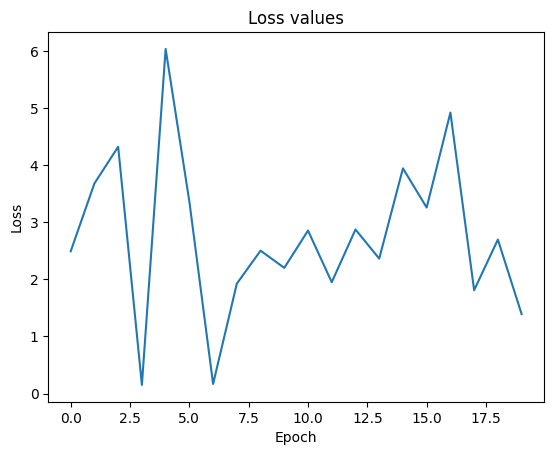

In [103]:
# Train the model
train_model(2, train_loader_pca, 20)
# Visualize the loss values
create_loss_chart(loss_values)

#TODO: Evaluate the model on the validation set

Input shape: 512
MLP2(
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=120, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)
Epoch 1, Loss: 6.038061618804932
Epoch 2, Loss: 3.5164809226989746
Epoch 3, Loss: 3.6856584548950195
Epoch 4, Loss: 3.2399024963378906
Epoch 5, Loss: 2.809520959854126
Epoch 6, Loss: 5.164368629455566
Epoch 7, Loss: 2.2412612438201904
Epoch 8, Loss: 2.04775333404541
Epoch 9, Loss: 1.713657259941101
Epoch 10, Loss: 1.8614383935928345


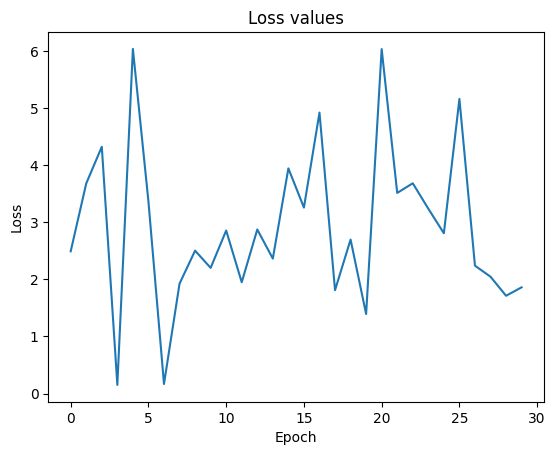

In [104]:
# Train the model
train_model(2, train_loader, 10)
# Visualize the loss values
create_loss_chart(loss_values)

#TODO: Evaluate the model on the validation set